In [82]:
import pandas as pd
file_path = 'C:\\Users\\jackf\\OneDrive\\Desktop\\Bike_Sharing\\cleaned_csv_LA_final.csv'
la_bike = pd.read_csv(file_path)
la_bike.head()

C:\Users\jackf\AppData\Local\Temp\ipykernel_10524\839958430.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  la_bike = pd.read_csv(file_path)


,trip_id,bike_id,day,month,year,hour,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_id,weather_main,weather_description,count
0,1912818.0,6281,7,7,2016,4,291.88,10000.0,287.97,291.85,291.83,293.11,1014,78,1.54,0,800,Clear,sky is clear,190
1,1919661.0,6281,7,7,2016,6,291.08,10000.0,287.97,291.07,290.94,291.45,1015,82,1.54,0,800,Clear,sky is clear,190
2,1933383.0,5861,7,7,2016,10,291.08,10000.0,287.97,291.07,290.89,291.23,1014,82,0.00,100,804,Clouds,overcast clouds,190
3,1944197.0,5861,7,7,2016,10,291.08,10000.0,287.97,291.07,290.89,291.23,1014,82,0.00,100,804,Clouds,overcast clouds,190
4,1940317.0,6674,7,7,2016,12,291.88,10000.0,287.97,291.85,291.45,291.94,1014,78,0.00,100,804,Clouds,overcast clouds,190


In [12]:
len(la_bike)

1051261

In [83]:
la_bike.columns

Index(['trip_id', 'bike_id', 'day', 'month', 'year', 'hour', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'count'],
      dtype='object')

In [32]:
import pandas as pd
print("Column names in the DataFrame:", la_bike.columns)
la_bike.info()


Column names in the DataFrame: Index(['trip_id', 'bike_id', 'day', 'month', 'year', 'hour', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051261 entries, 0 to 1051260
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   trip_id              1051261 non-null  float64
 1   bike_id              1051261 non-null  object 
 2   day                  1051261 non-null  int64  
 3   month                1051261 non-null  int64  
 4   year                 1051261 non-null  int64  
 5   hour                 1051261 non-null  int64  
 6   temp                 1051261 non-null  float64
 7   visibility           1043283 non-null  float64
 8   dew_point            1051261 non-null  

In [28]:
print(la_bike.columns)


Index(['trip_id', 'bike_id', 'day', 'month', 'year', 'hour', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'count'],
      dtype='object')


In [30]:
for col in la_bike.columns:
    print(repr(col))


'trip_id'
'bike_id'
'day'
'month'
'year'
'hour'
'temp'
'visibility'
'dew_point'
'feels_like'
'temp_min'
'temp_max'
'pressure'
'humidity'
'wind_speed'
'clouds_all'
'weather_id'
'weather_main'
'weather_description'
'count'


In [33]:
la_bike['bike_id'] = pd.to_numeric(la_bike['bike_id'], errors='coerce')
print("Number of missing values in 'bike_id':", la_bike['bike_id'].isnull().sum())
formula = 'count ~ trip_id + bike_id + day + month + year + hour + temp + visibility + dew_point + feels_like + temp_min + temp_max + pressure + humidity + wind_speed + clouds_all + weather_id + weather_main + weather_description'
ols_model = smf.ols(formula=formula, data=la_bike)
model1 = ols_model.fit()
print(model1.summary())

Number of missing values in 'bike_id': 9
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                 1.968e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:30:36   Log-Likelihood:            -7.0326e+06
No. Observations:             1043274   AIC:                         1.407e+07
Df Residuals:                 1043247   BIC:                         1.407e+07
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [34]:
mean_bike_id = la_bike['bike_id'].mean()
la_bike['bike_id'].fillna(mean_bike_id, inplace=True)
print("Number of missing values in 'bike_id' after imputation:", la_bike['bike_id'].isnull().sum())
ols_model = smf.ols(formula=formula, data=la_bike)
model1 = ols_model.fit()
print(model1.summary())


Number of missing values in 'bike_id' after imputation: 0
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                 1.968e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:31:04   Log-Likelihood:            -7.0327e+06
No. Observations:             1043283   AIC:                         1.407e+07
Df Residuals:                 1043256   BIC:                         1.407e+07
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [47]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


print("Number of samples in the dataset:", len(la_bike))
print("Column names in the DataFrame:", la_bike.columns)
print(la_bike.info())

missing_bike_id = la_bike['bike_id'].isnull().sum()
print("Number of missing values in 'bike_id':", missing_bike_id)
mean_bike_id = la_bike['bike_id'].mean()
la_bike['bike_id'].fillna(mean_bike_id, inplace=True)
print("Number of missing values in 'bike_id' after imputation:", la_bike['bike_id'].isnull().sum())
formula = 'count ~ month + year + hour + temp +  dew_point + feels_like + temp_min + temp_max + pressure + wind_speed'
ols_model = smf.ols(formula=formula, data=la_bike)
model1 = ols_model.fit()
print(model1.summary())


Number of samples in the dataset: 1051261
Column names in the DataFrame: Index(['trip_id', 'bike_id', 'day', 'month', 'year', 'hour', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051261 entries, 0 to 1051260
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   trip_id              1051261 non-null  float64
 1   bike_id              1051261 non-null  float64
 2   day                  1051261 non-null  int64  
 3   month                1051261 non-null  int64  
 4   year                 1051261 non-null  int64  
 5   hour                 1051261 non-null  int64  
 6   temp                 1051261 non-null  float64
 7   visibility           1043283 non-null  float64
 8

In [ ]:
## day and visbility gotta go 

In [51]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X = la_bike[['month', 'year', 'hour', 'temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'wind_speed']]
y = la_bike['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))
ols_model = sm.OLS(y_train, sm.add_constant(X_train))
model = ols_model.fit()
print(model.summary())
y_pred = model.predict(sm.add_constant(X_test))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(" ")
print("Mean Squared Error (MSE) on the test set:", mse)
print("R-squared (R2) on the test set:", r2)


Number of samples in the training set: 841008
Number of samples in the testing set: 210253
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                 3.087e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:39:40   Log-Likelihood:            -5.7019e+06
No. Observations:              841008   AIC:                         1.140e+07
Df Residuals:                  840997   BIC:                         1.140e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [57]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

X = la_bike[['trip_id', 'bike_id', 'day', 'month', 'year', 'hour', 'temp',
             'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
             'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_id']]
y = la_bike['count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X_train_imputed, y_train)
y_pred = rf_model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE) on the test set:", mse)
print("R-squared (R2) on the test set:", r2)

Mean Squared Error (MSE) on the test set: 21.576651537909086
R-squared (R2) on the test set: 0.9996581609524992


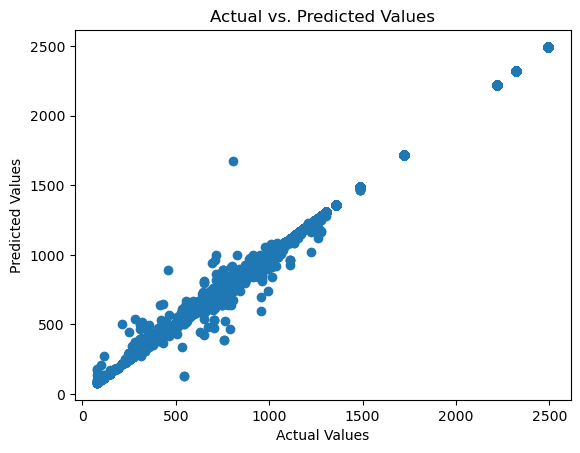

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


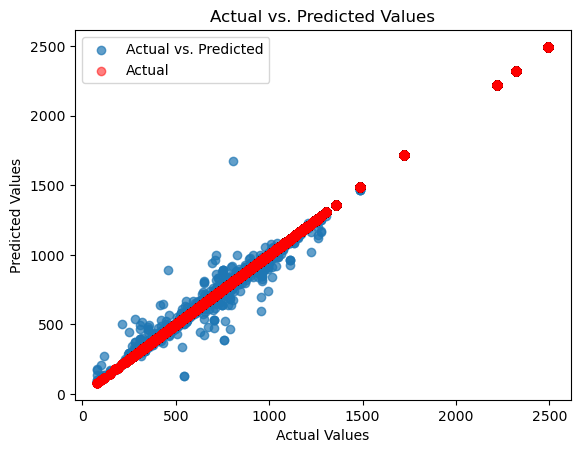

In [62]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, label='Actual vs. Predicted', alpha=0.7)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)  # Use red for y_test

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


In [63]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(rf_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse_cv = -scores.mean()
print("Mean Cross-Validated MSE:", mean_mse_cv)

Mean Cross-Validated MSE: 24.11551281116375


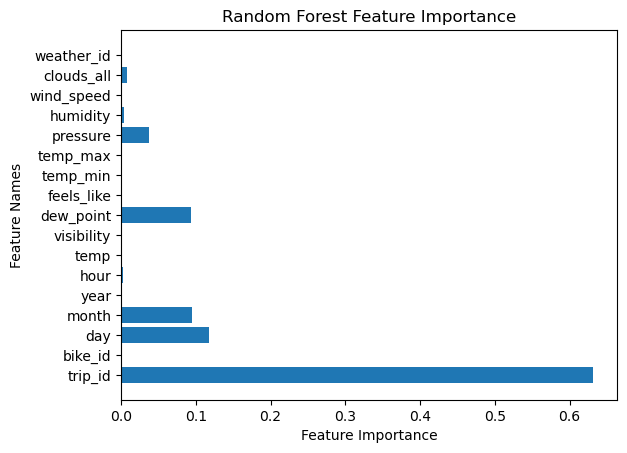

In [64]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Feature Importance')
plt.show()


In [65]:
print("Missing values in X_train_imputed:", pd.DataFrame(X_train_imputed).isnull().sum().sum())
print("Missing values in X_test_imputed:", pd.DataFrame(X_test_imputed).isnull().sum().sum())

Missing values in X_train_imputed: 0
Missing values in X_test_imputed: 0


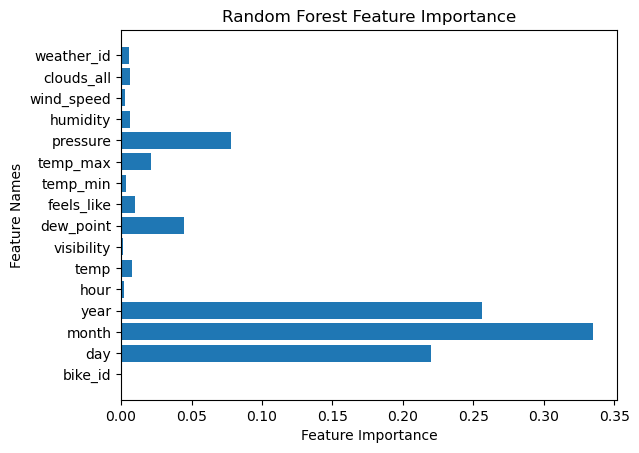

In [87]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a bar chart for feature importance
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Feature Importance')
plt.show()